## Import statements

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
import torchvision
from torchvision import transforms
import os
from datetime import datetime  # For generating timestamped folder names
from model import *
from data import *
from utils import *
from train import *
from tqdm.auto import tqdm
import os

# Check if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Hyperparameters & Dataset loading

In [4]:
params = {
    'batch_size': 256,
    'learning_rate': 0.01,
    'save_dir': 'model_ckpts',
    'weight_decay': 1e-4,
    'grad_clip': 0.1,
}

In [5]:
#Normal case
train_data_loader = create_train_data_loader(params["batch_size"])

#num instances ranging from 1,10,100,1000
train_data_num_1_loader = create_train_data_loader_with_num_instances(1, params["batch_size"])
train_data_num_10_loader = create_train_data_loader_with_num_instances(10, params["batch_size"])
train_data_num_100_loader = create_train_data_loader_with_num_instances(100, params["batch_size"])
train_data_num_1000_loader = create_train_data_loader_with_num_instances(1000, params["batch_size"])

#Testing and validation for all cases
test_data_loader, validation_data_loader = create_test_and_validation_data_loader(params["batch_size"])


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [6]:
def get_model_weight_path(experiment, epoch_num=None):
    directory = os.path.join(params["save_dir"], experiment)
    if epoch_num == None:
        # Get a list of all files in the directory
        files = os.listdir(directory)

        # Filter out only the files (exclude directories)
        files = [f for f in files if os.path.isfile(os.path.join(directory, f))]

        # Sort the files by their modification time in descending order (most recent first)
        files.sort(key=lambda x: os.path.getmtime(os.path.join(directory, x)), reverse=True)

        # Get the name of the most recently added file
        model_file = files[0] if files else None
    else:
        model_file = f"model_epoch_{epoch_num}.pt"
    return os.path.join(directory, model_file)


# <u>Experiment 1: Full dataset</u>

### 1.1 Train the model

In [16]:
full_experiment = "full"
full_cifar_model = CIFARClassifier()
full_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [17]:
full_epoch_numbers, full_training_losses, full_training_accuracy, full_validation_losses, full_validation_accuracy = train_model(
    full_cifar_model,
    train_data_loader,
    validation_data_loader,
    50,
    params,
    full_experiment,
    epoch_saver_count=1,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/50 [00:00<?, ?it/s]

Epoch 1/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1: train_loss: 1.1363145660256486 | train_accuracy: 0.58977 | val_loss: 0.7853668133417765 | val_accuracy: 0.7306666666666667 
Going to save model @ Epoch:1
Save checkpointed the model at the path model_ckpts\full\model_epoch_1.pt


Epoch 2/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2: train_loss: 0.6608250449837931 | train_accuracy: 0.77266 | val_loss: 0.5474538207054138 | val_accuracy: 0.8106666666666666 
Going to save model @ Epoch:2
Save checkpointed the model at the path model_ckpts\full\model_epoch_2.pt


Epoch 3/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3: train_loss: 0.5491565869897223 | train_accuracy: 0.81349 | val_loss: 0.6952909131844839 | val_accuracy: 0.774 
Going to save model @ Epoch:3
Save checkpointed the model at the path model_ckpts\full\model_epoch_3.pt


Epoch 4/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4: train_loss: 0.49966417363537546 | train_accuracy: 0.83025 | val_loss: 0.4815833618243535 | val_accuracy: 0.8453333333333334 
Going to save model @ Epoch:4
Save checkpointed the model at the path model_ckpts\full\model_epoch_4.pt


Epoch 5/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5: train_loss: 0.47799106197588886 | train_accuracy: 0.83879 | val_loss: 0.5011452386776606 | val_accuracy: 0.8306666666666667 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\full\model_epoch_5.pt


Epoch 6/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6: train_loss: 0.46809297373227754 | train_accuracy: 0.84469 | val_loss: 0.5454108317693075 | val_accuracy: 0.8153333333333334 
Going to save model @ Epoch:6
Save checkpointed the model at the path model_ckpts\full\model_epoch_6.pt


Epoch 7/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7: train_loss: 0.46640807504544174 | train_accuracy: 0.84478 | val_loss: 0.5455832133690516 | val_accuracy: 0.82 
Going to save model @ Epoch:7
Save checkpointed the model at the path model_ckpts\full\model_epoch_7.pt


Epoch 8/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8: train_loss: 0.4709817023990709 | train_accuracy: 0.84333 | val_loss: 0.5776409208774567 | val_accuracy: 0.8133333333333334 
Going to save model @ Epoch:8
Save checkpointed the model at the path model_ckpts\full\model_epoch_8.pt


Epoch 9/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9: train_loss: 0.49360683773789565 | train_accuracy: 0.83901 | val_loss: 0.6512326697508494 | val_accuracy: 0.798 
Going to save model @ Epoch:9
Save checkpointed the model at the path model_ckpts\full\model_epoch_9.pt


Epoch 10/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10: train_loss: 0.49985203291753977 | train_accuracy: 0.83831 | val_loss: 0.6109988788763682 | val_accuracy: 0.806 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\full\model_epoch_10.pt


Epoch 11/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11: train_loss: 0.509288627701952 | train_accuracy: 0.83316 | val_loss: 1.094930609067281 | val_accuracy: 0.6953333333333334 
Going to save model @ Epoch:11
Save checkpointed the model at the path model_ckpts\full\model_epoch_11.pt


Epoch 12/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12: train_loss: 0.5164804261968569 | train_accuracy: 0.82927 | val_loss: 0.7417442301909128 | val_accuracy: 0.7586666666666667 
Going to save model @ Epoch:12
Save checkpointed the model at the path model_ckpts\full\model_epoch_12.pt


Epoch 13/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13: train_loss: 0.5316000507615716 | train_accuracy: 0.82575 | val_loss: 0.7044007281462351 | val_accuracy: 0.7706666666666667 
Going to save model @ Epoch:13
Save checkpointed the model at the path model_ckpts\full\model_epoch_13.pt


Epoch 14/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14: train_loss: 0.5348200372722752 | train_accuracy: 0.82393 | val_loss: 0.6208503991365433 | val_accuracy: 0.7846666666666666 
Going to save model @ Epoch:14
Save checkpointed the model at the path model_ckpts\full\model_epoch_14.pt


Epoch 15/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15: train_loss: 0.5416637087417076 | train_accuracy: 0.82209 | val_loss: 0.7120768825213114 | val_accuracy: 0.7613333333333333 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\full\model_epoch_15.pt


Epoch 16/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16: train_loss: 0.537380432533791 | train_accuracy: 0.82371 | val_loss: 0.8098464806874593 | val_accuracy: 0.7426666666666667 
Going to save model @ Epoch:16
Save checkpointed the model at the path model_ckpts\full\model_epoch_16.pt


Epoch 17/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17: train_loss: 0.5364169751286811 | train_accuracy: 0.82352 | val_loss: 0.6144228478272756 | val_accuracy: 0.796 
Going to save model @ Epoch:17
Save checkpointed the model at the path model_ckpts\full\model_epoch_17.pt


Epoch 18/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18: train_loss: 0.5319286279208825 | train_accuracy: 0.82568 | val_loss: 0.67001540462176 | val_accuracy: 0.7813333333333333 
Going to save model @ Epoch:18
Save checkpointed the model at the path model_ckpts\full\model_epoch_18.pt


Epoch 19/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19: train_loss: 0.521532100865908 | train_accuracy: 0.82949 | val_loss: 0.6903213163216909 | val_accuracy: 0.7853333333333333 
Going to save model @ Epoch:19
Save checkpointed the model at the path model_ckpts\full\model_epoch_19.pt


Epoch 20/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20: train_loss: 0.5155171300749035 | train_accuracy: 0.82943 | val_loss: 0.6118667523066202 | val_accuracy: 0.8006666666666666 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\full\model_epoch_20.pt


Epoch 21/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21: train_loss: 0.5072977382813573 | train_accuracy: 0.8339 | val_loss: 0.524493008852005 | val_accuracy: 0.8273333333333334 
Going to save model @ Epoch:21
Save checkpointed the model at the path model_ckpts\full\model_epoch_21.pt


Epoch 22/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 22: train_loss: 0.49124689000037014 | train_accuracy: 0.83889 | val_loss: 0.7332152922948202 | val_accuracy: 0.7573333333333333 
Going to save model @ Epoch:22
Save checkpointed the model at the path model_ckpts\full\model_epoch_22.pt


Epoch 23/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 23: train_loss: 0.4824238301390577 | train_accuracy: 0.84217 | val_loss: 0.7007242441177368 | val_accuracy: 0.7853333333333333 
Going to save model @ Epoch:23
Save checkpointed the model at the path model_ckpts\full\model_epoch_23.pt


Epoch 24/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 24: train_loss: 0.47202409327487505 | train_accuracy: 0.84526 | val_loss: 0.6591743528842926 | val_accuracy: 0.794 
Going to save model @ Epoch:24
Save checkpointed the model at the path model_ckpts\full\model_epoch_24.pt


Epoch 25/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.4557437346414532 | train_accuracy: 0.85005 | val_loss: 0.6027167737483978 | val_accuracy: 0.8106666666666666 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\full\model_epoch_25.pt


Epoch 26/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.447881513773023 | train_accuracy: 0.85254 | val_loss: 0.4413577616214752 | val_accuracy: 0.8533333333333334 
Going to save model @ Epoch:26
Save checkpointed the model at the path model_ckpts\full\model_epoch_26.pt


Epoch 27/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.43386902597249316 | train_accuracy: 0.85838 | val_loss: 0.5151144365469614 | val_accuracy: 0.8306666666666667 
Going to save model @ Epoch:27
Save checkpointed the model at the path model_ckpts\full\model_epoch_27.pt


Epoch 28/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.41371437407972866 | train_accuracy: 0.86348 | val_loss: 0.45846617221832275 | val_accuracy: 0.8486666666666667 
Going to save model @ Epoch:28
Save checkpointed the model at the path model_ckpts\full\model_epoch_28.pt


Epoch 29/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.40856672308938885 | train_accuracy: 0.86679 | val_loss: 0.5320974787076315 | val_accuracy: 0.8373333333333334 
Going to save model @ Epoch:29
Save checkpointed the model at the path model_ckpts\full\model_epoch_29.pt


Epoch 30/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.3879849373379632 | train_accuracy: 0.87174 | val_loss: 0.5021859457095464 | val_accuracy: 0.8333333333333334 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\full\model_epoch_30.pt


Epoch 31/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 31: train_loss: 0.37022611571242436 | train_accuracy: 0.87746 | val_loss: 0.4423465430736542 | val_accuracy: 0.8606666666666667 
Going to save model @ Epoch:31
Save checkpointed the model at the path model_ckpts\full\model_epoch_31.pt


Epoch 32/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 32: train_loss: 0.3564366685307544 | train_accuracy: 0.88165 | val_loss: 0.5067797551552454 | val_accuracy: 0.8406666666666667 
Going to save model @ Epoch:32
Save checkpointed the model at the path model_ckpts\full\model_epoch_32.pt


Epoch 33/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 33: train_loss: 0.3398262035968663 | train_accuracy: 0.8869 | val_loss: 0.3865237881739934 | val_accuracy: 0.864 
Going to save model @ Epoch:33
Save checkpointed the model at the path model_ckpts\full\model_epoch_33.pt


Epoch 34/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 34: train_loss: 0.3243074763537673 | train_accuracy: 0.89296 | val_loss: 0.35802724460760754 | val_accuracy: 0.886 
Going to save model @ Epoch:34
Save checkpointed the model at the path model_ckpts\full\model_epoch_34.pt


Epoch 35/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 35: train_loss: 0.2977692750866151 | train_accuracy: 0.90046 | val_loss: 0.39207544426123303 | val_accuracy: 0.8706666666666667 
Going to save model @ Epoch:35
Save checkpointed the model at the path model_ckpts\full\model_epoch_35.pt


Epoch 36/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 36: train_loss: 0.27711747815389465 | train_accuracy: 0.9077 | val_loss: 0.3430950070420901 | val_accuracy: 0.892 
Going to save model @ Epoch:36
Save checkpointed the model at the path model_ckpts\full\model_epoch_36.pt


Epoch 37/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 37: train_loss: 0.2628665544340373 | train_accuracy: 0.91223 | val_loss: 0.33754849930604297 | val_accuracy: 0.8913333333333333 
Going to save model @ Epoch:37
Save checkpointed the model at the path model_ckpts\full\model_epoch_37.pt


Epoch 38/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 38: train_loss: 0.23936058481788391 | train_accuracy: 0.92046 | val_loss: 0.34608833491802216 | val_accuracy: 0.9 
Going to save model @ Epoch:38
Save checkpointed the model at the path model_ckpts\full\model_epoch_38.pt


Epoch 39/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 39: train_loss: 0.22195175377761617 | train_accuracy: 0.9277 | val_loss: 0.389363557100296 | val_accuracy: 0.8826666666666667 
Going to save model @ Epoch:39
Save checkpointed the model at the path model_ckpts\full\model_epoch_39.pt


Epoch 40/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 40: train_loss: 0.2032365532939696 | train_accuracy: 0.93368 | val_loss: 0.3210926353931427 | val_accuracy: 0.9046666666666666 
Going to save model @ Epoch:40
Save checkpointed the model at the path model_ckpts\full\model_epoch_40.pt


Epoch 41/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 41: train_loss: 0.18258677350590602 | train_accuracy: 0.94011 | val_loss: 0.3133415977160136 | val_accuracy: 0.9106666666666666 
Going to save model @ Epoch:41
Save checkpointed the model at the path model_ckpts\full\model_epoch_41.pt


Epoch 42/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 42: train_loss: 0.16605842858552933 | train_accuracy: 0.94642 | val_loss: 0.3168014536301295 | val_accuracy: 0.906 
Going to save model @ Epoch:42
Save checkpointed the model at the path model_ckpts\full\model_epoch_42.pt


Epoch 43/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 43: train_loss: 0.1557563495110063 | train_accuracy: 0.95068 | val_loss: 0.3027433107296626 | val_accuracy: 0.9106666666666666 
Going to save model @ Epoch:43
Save checkpointed the model at the path model_ckpts\full\model_epoch_43.pt


Epoch 44/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 44: train_loss: 0.13770821944946218 | train_accuracy: 0.95536 | val_loss: 0.31482866158088046 | val_accuracy: 0.9146666666666666 
Going to save model @ Epoch:44
Save checkpointed the model at the path model_ckpts\full\model_epoch_44.pt


Epoch 45/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 45: train_loss: 0.12628058096408235 | train_accuracy: 0.95992 | val_loss: 0.29319318135579425 | val_accuracy: 0.9146666666666666 
Going to save model @ Epoch:45
Save checkpointed the model at the path model_ckpts\full\model_epoch_45.pt


Epoch 46/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 46: train_loss: 0.12011599182472814 | train_accuracy: 0.96226 | val_loss: 0.2838781476020813 | val_accuracy: 0.9146666666666666 
Going to save model @ Epoch:46
Save checkpointed the model at the path model_ckpts\full\model_epoch_46.pt


Epoch 47/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 47: train_loss: 0.10986118832283923 | train_accuracy: 0.96538 | val_loss: 0.2787134697039922 | val_accuracy: 0.916 
Going to save model @ Epoch:47
Save checkpointed the model at the path model_ckpts\full\model_epoch_47.pt


Epoch 48/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 48: train_loss: 0.10683026665921712 | train_accuracy: 0.9659 | val_loss: 0.2741999427477519 | val_accuracy: 0.918 
Going to save model @ Epoch:48
Save checkpointed the model at the path model_ckpts\full\model_epoch_48.pt


Epoch 49/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 49: train_loss: 0.10251753176074199 | train_accuracy: 0.96748 | val_loss: 0.27130067845185596 | val_accuracy: 0.9193333333333333 
Going to save model @ Epoch:49
Save checkpointed the model at the path model_ckpts\full\model_epoch_49.pt


Epoch 50/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 50: train_loss: 0.10321742764023868 | train_accuracy: 0.96682 | val_loss: 0.2718747953573863 | val_accuracy: 0.92 
Going to save model @ Epoch:50
Save checkpointed the model at the path model_ckpts\full\model_epoch_50.pt


### 1.2 Test the model

In [18]:
full_cifar_test_accuracy, full_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, full_cifar_model, test_data_loader)
print(f"Test loss: {full_cifar_test_loss} | Test accuracy: {full_cifar_test_accuracy}")

Test loss: 0.2986906249733532 | Test accuracy: 0.9125882352941177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


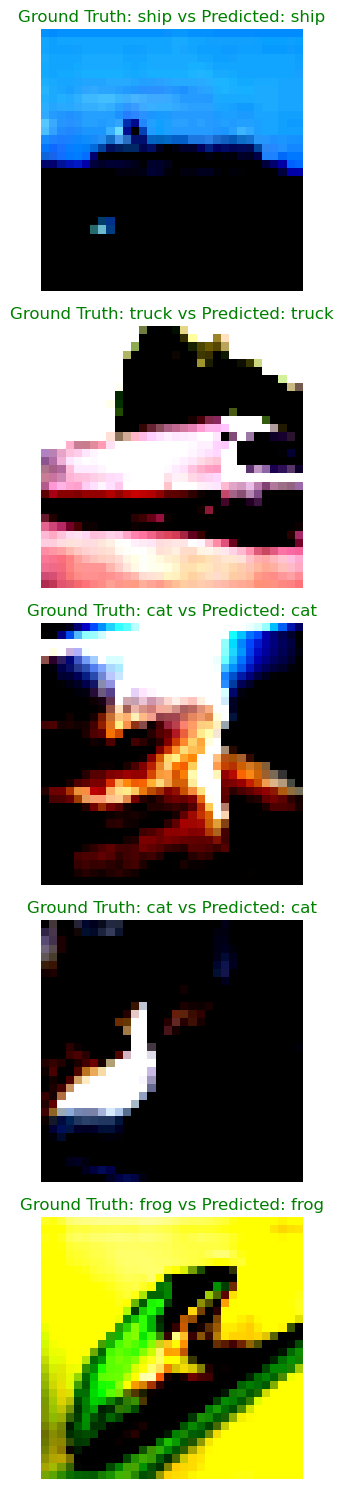

In [19]:
show_predictions(full_cifar_model, test_data_loader)

### 1.3 Plot graphs

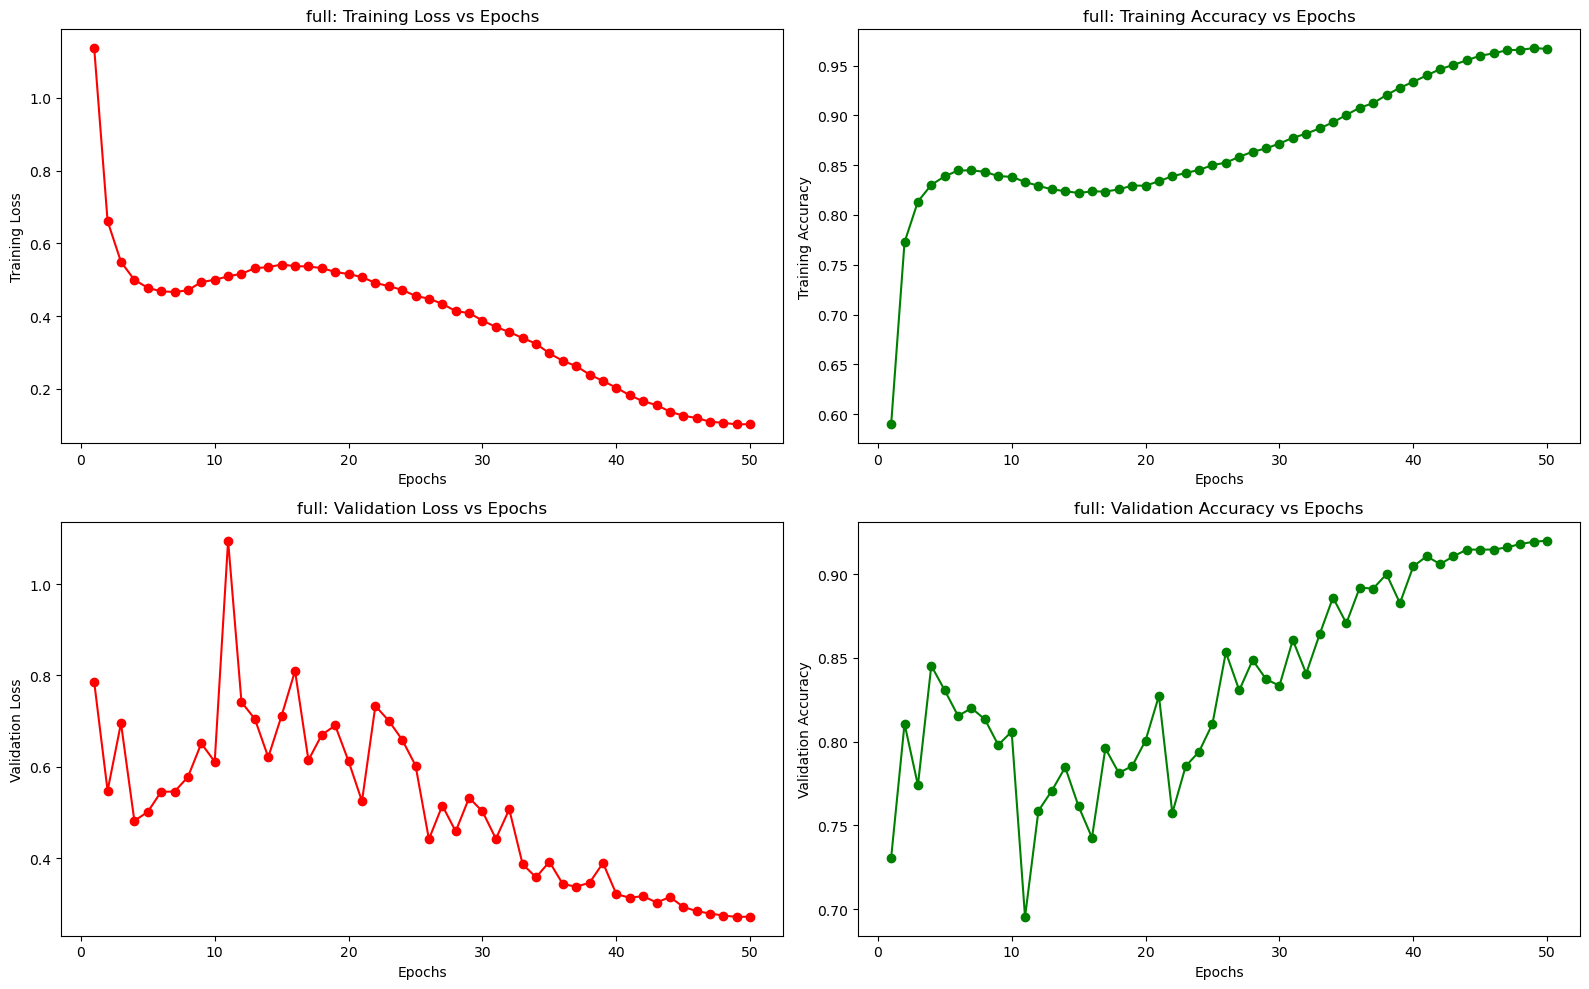

In [20]:
plot_model_training_stats(full_experiment, full_epoch_numbers, full_training_losses, full_validation_losses, full_training_accuracy, full_validation_accuracy)

# <u>Experiment 2: 1 instance per class dataset</u>

### 2.1 Train the model

In [7]:
one_experiment = "one"
one_cifar_model = CIFARClassifier()
one_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [8]:
one_epoch_numbers, one_training_losses, one_training_accuracy, one_validation_losses, one_validation_accuracy = train_model(
    one_cifar_model,
    train_data_num_1_loader,
    validation_data_loader,
    50,
    params,
    one_experiment,
    epoch_saver_count=1,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/50 [00:00<?, ?it/s]

Epoch 1/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.366116523742676 | train_accuracy: 0.1 | val_loss: 2.2999041080474854 | val_accuracy: 0.11466666666666667 
Going to save model @ Epoch:1
Save checkpointed the model at the path model_ckpts\one\model_epoch_1.pt


Epoch 2/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2: train_loss: 1.986907958984375 | train_accuracy: 0.4 | val_loss: 2.2960921128590903 | val_accuracy: 0.114 
Going to save model @ Epoch:2
Save checkpointed the model at the path model_ckpts\one\model_epoch_2.pt


Epoch 3/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3: train_loss: 1.534402847290039 | train_accuracy: 0.4 | val_loss: 2.2869210243225098 | val_accuracy: 0.132 
Going to save model @ Epoch:3
Save checkpointed the model at the path model_ckpts\one\model_epoch_3.pt


Epoch 4/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.5015159845352173 | train_accuracy: 0.7 | val_loss: 2.3617467880249023 | val_accuracy: 0.116 
Going to save model @ Epoch:4
Save checkpointed the model at the path model_ckpts\one\model_epoch_4.pt


Epoch 5/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.2000553607940674 | train_accuracy: 0.4 | val_loss: 3.3081458806991577 | val_accuracy: 0.108 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\one\model_epoch_5.pt


Epoch 6/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6: train_loss: 1.203221082687378 | train_accuracy: 0.7 | val_loss: 5.670363108317058 | val_accuracy: 0.11733333333333333 
Going to save model @ Epoch:6
Save checkpointed the model at the path model_ckpts\one\model_epoch_6.pt


Epoch 7/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 7: train_loss: 0.8299095034599304 | train_accuracy: 0.9 | val_loss: 12.745542367299398 | val_accuracy: 0.108 
Going to save model @ Epoch:7
Save checkpointed the model at the path model_ckpts\one\model_epoch_7.pt


Epoch 8/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 8: train_loss: 1.3493280410766602 | train_accuracy: 0.5 | val_loss: 19.17685031890869 | val_accuracy: 0.10866666666666666 
Going to save model @ Epoch:8
Save checkpointed the model at the path model_ckpts\one\model_epoch_8.pt


Epoch 9/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.3127694129943848 | train_accuracy: 0.6 | val_loss: 97.56895573933919 | val_accuracy: 0.10733333333333334 
Going to save model @ Epoch:9
Save checkpointed the model at the path model_ckpts\one\model_epoch_9.pt


Epoch 10/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 10: train_loss: 2.5218276977539062 | train_accuracy: 0.5 | val_loss: 152.50302124023438 | val_accuracy: 0.098 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\one\model_epoch_10.pt


Epoch 11/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 11: train_loss: 2.295299530029297 | train_accuracy: 0.4 | val_loss: 227.4709726969401 | val_accuracy: 0.10066666666666667 
Going to save model @ Epoch:11
Save checkpointed the model at the path model_ckpts\one\model_epoch_11.pt


Epoch 12/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 12: train_loss: 2.418323040008545 | train_accuracy: 0.5 | val_loss: 200.7208023071289 | val_accuracy: 0.09666666666666666 
Going to save model @ Epoch:12
Save checkpointed the model at the path model_ckpts\one\model_epoch_12.pt


Epoch 13/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 13: train_loss: 0.619454026222229 | train_accuracy: 0.9 | val_loss: 287.5509084065755 | val_accuracy: 0.10733333333333334 
Going to save model @ Epoch:13
Save checkpointed the model at the path model_ckpts\one\model_epoch_13.pt


Epoch 14/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.9157596826553345 | train_accuracy: 0.2 | val_loss: 221.3062286376953 | val_accuracy: 0.11533333333333333 
Going to save model @ Epoch:14
Save checkpointed the model at the path model_ckpts\one\model_epoch_14.pt


Epoch 15/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.8334076404571533 | train_accuracy: 0.4 | val_loss: 106.4157346089681 | val_accuracy: 0.11133333333333334 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\one\model_epoch_15.pt


Epoch 16/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.074816107749939 | train_accuracy: 0.6 | val_loss: 95.14004262288411 | val_accuracy: 0.11866666666666667 
Going to save model @ Epoch:16
Save checkpointed the model at the path model_ckpts\one\model_epoch_16.pt


Epoch 17/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.2893673181533813 | train_accuracy: 0.5 | val_loss: 154.82567087809244 | val_accuracy: 0.13133333333333333 
Going to save model @ Epoch:17
Save checkpointed the model at the path model_ckpts\one\model_epoch_17.pt


Epoch 18/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 18: train_loss: 0.705518364906311 | train_accuracy: 0.7 | val_loss: 182.88399251302084 | val_accuracy: 0.13933333333333334 
Going to save model @ Epoch:18
Save checkpointed the model at the path model_ckpts\one\model_epoch_18.pt


Epoch 19/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 19: train_loss: 0.9344154596328735 | train_accuracy: 0.6 | val_loss: 228.15828450520834 | val_accuracy: 0.12666666666666668 
Going to save model @ Epoch:19
Save checkpointed the model at the path model_ckpts\one\model_epoch_19.pt


Epoch 20/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 20: train_loss: 1.8759679794311523 | train_accuracy: 0.7 | val_loss: 169.61156463623047 | val_accuracy: 0.11066666666666666 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\one\model_epoch_20.pt


Epoch 21/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 21: train_loss: 1.4735589027404785 | train_accuracy: 0.7 | val_loss: 114.63500849405925 | val_accuracy: 0.12066666666666667 
Going to save model @ Epoch:21
Save checkpointed the model at the path model_ckpts\one\model_epoch_21.pt


Epoch 22/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 22: train_loss: 0.4446944296360016 | train_accuracy: 0.8 | val_loss: 80.58735275268555 | val_accuracy: 0.14 
Going to save model @ Epoch:22
Save checkpointed the model at the path model_ckpts\one\model_epoch_22.pt


Epoch 23/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 23: train_loss: 0.19445958733558655 | train_accuracy: 0.9 | val_loss: 79.45139567057292 | val_accuracy: 0.136 
Going to save model @ Epoch:23
Save checkpointed the model at the path model_ckpts\one\model_epoch_23.pt


Epoch 24/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 24: train_loss: 1.1812185049057007 | train_accuracy: 0.7 | val_loss: 76.003724416097 | val_accuracy: 0.13933333333333334 
Going to save model @ Epoch:24
Save checkpointed the model at the path model_ckpts\one\model_epoch_24.pt


Epoch 25/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.8847192525863647 | train_accuracy: 0.8 | val_loss: 63.34737968444824 | val_accuracy: 0.12533333333333332 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\one\model_epoch_25.pt


Epoch 26/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.10981156677007675 | train_accuracy: 1.0 | val_loss: 54.03224436442057 | val_accuracy: 0.13133333333333333 
Going to save model @ Epoch:26
Save checkpointed the model at the path model_ckpts\one\model_epoch_26.pt


Epoch 27/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.2353150099515915 | train_accuracy: 0.9 | val_loss: 47.88604736328125 | val_accuracy: 0.124 
Going to save model @ Epoch:27
Save checkpointed the model at the path model_ckpts\one\model_epoch_27.pt


Epoch 28/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.6570329666137695 | train_accuracy: 0.9 | val_loss: 41.849599838256836 | val_accuracy: 0.122 
Going to save model @ Epoch:28
Save checkpointed the model at the path model_ckpts\one\model_epoch_28.pt


Epoch 29/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.792343020439148 | train_accuracy: 0.8 | val_loss: 32.435224850972496 | val_accuracy: 0.114 
Going to save model @ Epoch:29
Save checkpointed the model at the path model_ckpts\one\model_epoch_29.pt


Epoch 30/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.5556787848472595 | train_accuracy: 0.7 | val_loss: 35.18630154927572 | val_accuracy: 0.12 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\one\model_epoch_30.pt


Epoch 31/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 31: train_loss: 0.148849755525589 | train_accuracy: 0.9 | val_loss: 37.566921869913735 | val_accuracy: 0.12666666666666668 
Going to save model @ Epoch:31
Save checkpointed the model at the path model_ckpts\one\model_epoch_31.pt


Epoch 32/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 32: train_loss: 0.6456942558288574 | train_accuracy: 0.8 | val_loss: 36.95470174153646 | val_accuracy: 0.12666666666666668 
Going to save model @ Epoch:32
Save checkpointed the model at the path model_ckpts\one\model_epoch_32.pt


Epoch 33/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 33: train_loss: 0.6784151196479797 | train_accuracy: 0.8 | val_loss: 35.774563471476235 | val_accuracy: 0.13333333333333333 
Going to save model @ Epoch:33
Save checkpointed the model at the path model_ckpts\one\model_epoch_33.pt


Epoch 34/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 34: train_loss: 0.2578027546405792 | train_accuracy: 0.9 | val_loss: 34.99487813313802 | val_accuracy: 0.12733333333333333 
Going to save model @ Epoch:34
Save checkpointed the model at the path model_ckpts\one\model_epoch_34.pt


Epoch 35/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 35: train_loss: 0.045861296355724335 | train_accuracy: 1.0 | val_loss: 34.22138532002767 | val_accuracy: 0.118 
Going to save model @ Epoch:35
Save checkpointed the model at the path model_ckpts\one\model_epoch_35.pt


Epoch 36/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 36: train_loss: 1.0789228677749634 | train_accuracy: 0.8 | val_loss: 32.50792853037516 | val_accuracy: 0.13533333333333333 
Going to save model @ Epoch:36
Save checkpointed the model at the path model_ckpts\one\model_epoch_36.pt


Epoch 37/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 37: train_loss: 0.03250449150800705 | train_accuracy: 1.0 | val_loss: 32.38500817616781 | val_accuracy: 0.142 
Going to save model @ Epoch:37
Save checkpointed the model at the path model_ckpts\one\model_epoch_37.pt


Epoch 38/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 38: train_loss: 0.02038228139281273 | train_accuracy: 1.0 | val_loss: 31.610312461853027 | val_accuracy: 0.13933333333333334 
Going to save model @ Epoch:38
Save checkpointed the model at the path model_ckpts\one\model_epoch_38.pt


Epoch 39/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 39: train_loss: 0.1084369570016861 | train_accuracy: 0.9 | val_loss: 30.48290189107259 | val_accuracy: 0.138 
Going to save model @ Epoch:39
Save checkpointed the model at the path model_ckpts\one\model_epoch_39.pt


Epoch 40/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 40: train_loss: 0.12608088552951813 | train_accuracy: 0.9 | val_loss: 28.980923016866047 | val_accuracy: 0.13466666666666666 
Going to save model @ Epoch:40
Save checkpointed the model at the path model_ckpts\one\model_epoch_40.pt


Epoch 41/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 41: train_loss: 0.12961336970329285 | train_accuracy: 1.0 | val_loss: 27.097617149353027 | val_accuracy: 0.138 
Going to save model @ Epoch:41
Save checkpointed the model at the path model_ckpts\one\model_epoch_41.pt


Epoch 42/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 42: train_loss: 0.22149670124053955 | train_accuracy: 0.9 | val_loss: 25.13968817392985 | val_accuracy: 0.134 
Going to save model @ Epoch:42
Save checkpointed the model at the path model_ckpts\one\model_epoch_42.pt


Epoch 43/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 43: train_loss: 0.2013789862394333 | train_accuracy: 0.9 | val_loss: 23.270610809326172 | val_accuracy: 0.132 
Going to save model @ Epoch:43
Save checkpointed the model at the path model_ckpts\one\model_epoch_43.pt


Epoch 44/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 44: train_loss: 0.21067757904529572 | train_accuracy: 0.9 | val_loss: 21.575995763142902 | val_accuracy: 0.13066666666666665 
Going to save model @ Epoch:44
Save checkpointed the model at the path model_ckpts\one\model_epoch_44.pt


Epoch 45/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 45: train_loss: 0.05694664642214775 | train_accuracy: 1.0 | val_loss: 20.466739336649578 | val_accuracy: 0.126 
Going to save model @ Epoch:45
Save checkpointed the model at the path model_ckpts\one\model_epoch_45.pt


Epoch 46/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 46: train_loss: 0.05507422611117363 | train_accuracy: 1.0 | val_loss: 19.195427576700848 | val_accuracy: 0.12666666666666668 
Going to save model @ Epoch:46
Save checkpointed the model at the path model_ckpts\one\model_epoch_46.pt


Epoch 47/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 47: train_loss: 0.007703559007495642 | train_accuracy: 1.0 | val_loss: 18.239821434020996 | val_accuracy: 0.12866666666666668 
Going to save model @ Epoch:47
Save checkpointed the model at the path model_ckpts\one\model_epoch_47.pt


Epoch 48/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 48: train_loss: 0.028723787516355515 | train_accuracy: 1.0 | val_loss: 17.578553835550945 | val_accuracy: 0.12466666666666666 
Going to save model @ Epoch:48
Save checkpointed the model at the path model_ckpts\one\model_epoch_48.pt


Epoch 49/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 49: train_loss: 0.33079764246940613 | train_accuracy: 0.9 | val_loss: 16.875151475270588 | val_accuracy: 0.12666666666666668 
Going to save model @ Epoch:49
Save checkpointed the model at the path model_ckpts\one\model_epoch_49.pt


Epoch 50/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 50: train_loss: 0.024549972265958786 | train_accuracy: 1.0 | val_loss: 16.32865285873413 | val_accuracy: 0.12666666666666668 
Going to save model @ Epoch:50
Save checkpointed the model at the path model_ckpts\one\model_epoch_50.pt


### 2.2 Test the model

In [9]:
one_cifar_test_accuracy, one_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, one_cifar_model, test_data_loader)
print(f"Test loss: {one_cifar_test_loss} | Test accuracy: {one_cifar_test_accuracy}")

Test loss: 16.14632199792301 | Test accuracy: 0.14341176470588235


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


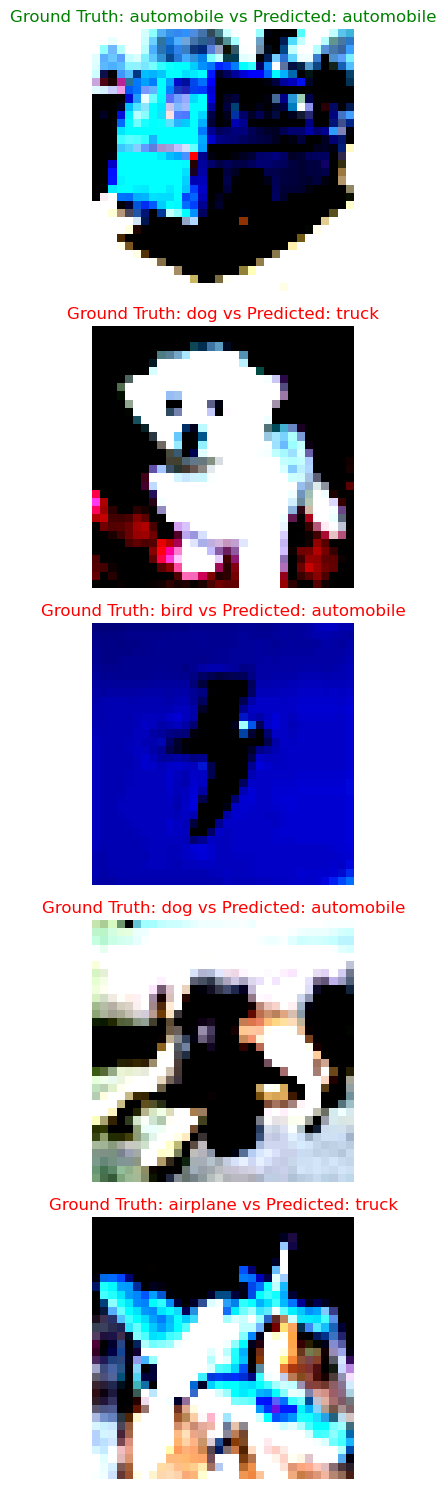

In [10]:
show_predictions(one_cifar_model, test_data_loader)

### 2.3 Plot graphs

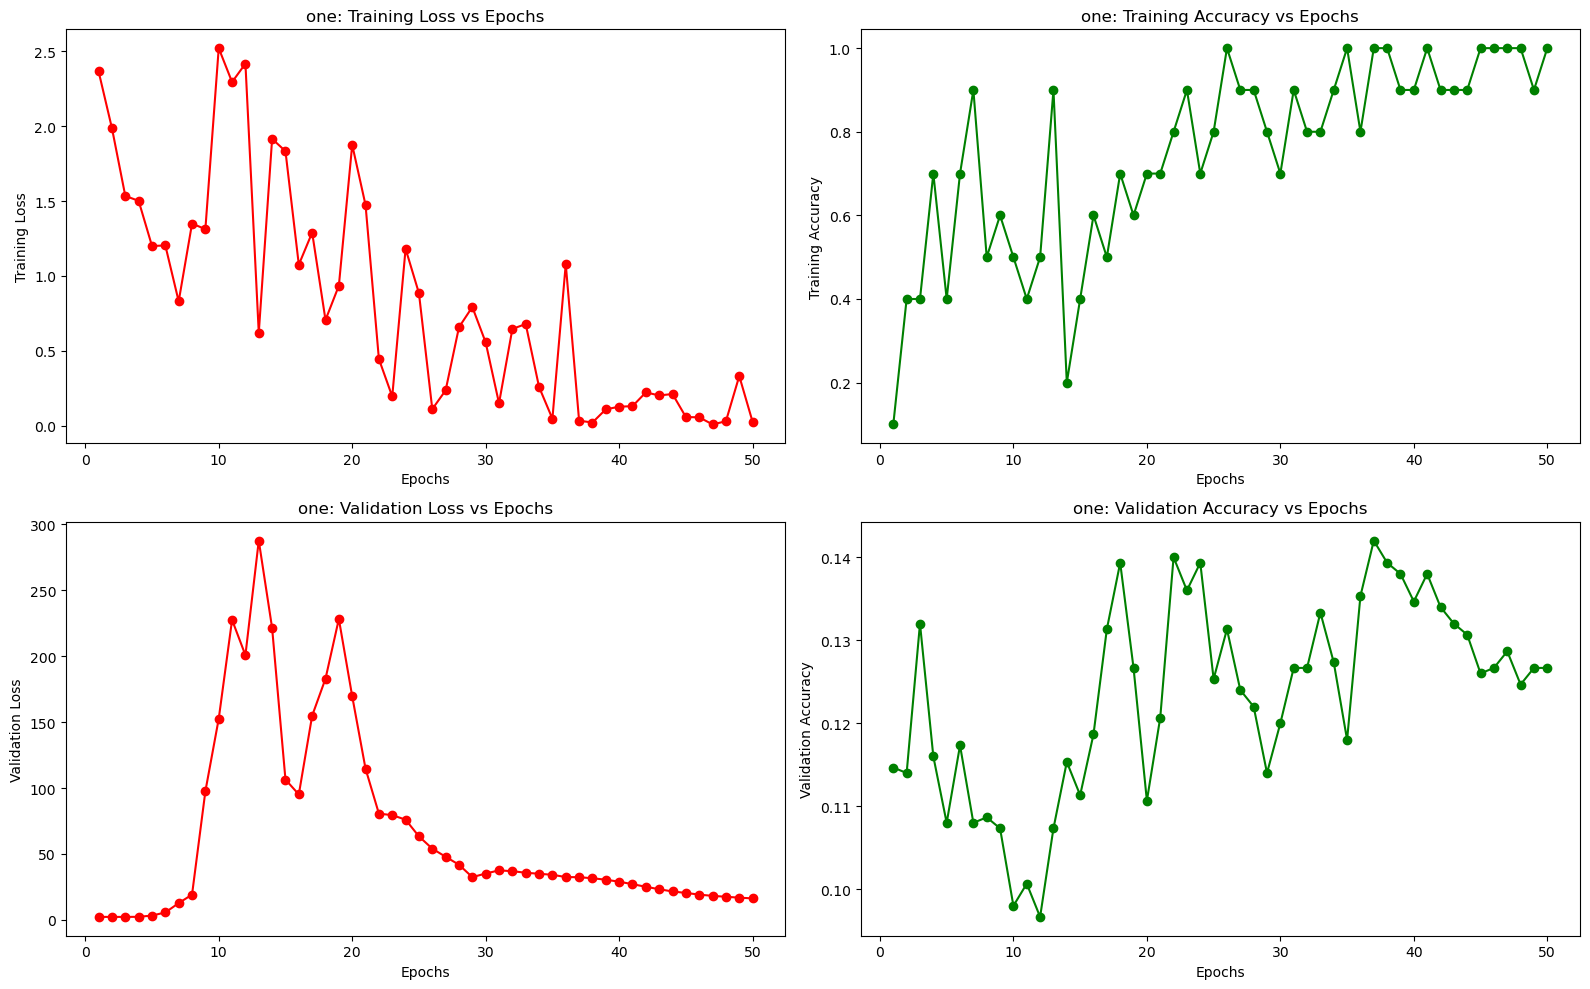

In [11]:
plot_model_training_stats(one_experiment, one_epoch_numbers, one_training_losses, one_validation_losses, one_training_accuracy, one_validation_accuracy)

# <u>Experiment 3: 10 instance per class dataset</u>

### 3.1 Train the model

In [12]:
ten_experiment = "ten"
ten_cifar_model = CIFARClassifier()
ten_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [13]:
ten_epoch_numbers, ten_training_losses, ten_training_accuracy, ten_validation_losses, ten_validation_accuracy = train_model(
    ten_cifar_model,
    train_data_num_10_loader,
    validation_data_loader,
    30,
    params,
    ten_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.459319829940796 | train_accuracy: 0.05 | val_loss: 2.297815283139547 | val_accuracy: 0.13 


Epoch 2/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2: train_loss: 2.2120890617370605 | train_accuracy: 0.15 | val_loss: 2.2939968506495156 | val_accuracy: 0.13266666666666665 


Epoch 3/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3: train_loss: 2.01035475730896 | train_accuracy: 0.28 | val_loss: 2.404029925664266 | val_accuracy: 0.10133333333333333 


Epoch 4/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.9274423122406006 | train_accuracy: 0.24 | val_loss: 3.3647615114847818 | val_accuracy: 0.10333333333333333 


Epoch 5/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5: train_loss: 2.1412084102630615 | train_accuracy: 0.23 | val_loss: 5.665303866068522 | val_accuracy: 0.134 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\ten\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6: train_loss: 2.3827157020568848 | train_accuracy: 0.21 | val_loss: 55.88448015848795 | val_accuracy: 0.10666666666666667 


Epoch 7/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 7: train_loss: 2.3414182662963867 | train_accuracy: 0.25 | val_loss: 47.460007985432945 | val_accuracy: 0.10933333333333334 


Epoch 8/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 8: train_loss: 2.1967310905456543 | train_accuracy: 0.15 | val_loss: 61.87553278605143 | val_accuracy: 0.1 


Epoch 9/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9: train_loss: 2.0081305503845215 | train_accuracy: 0.22 | val_loss: 78.90435028076172 | val_accuracy: 0.10533333333333333 


Epoch 10/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 10: train_loss: 2.0905232429504395 | train_accuracy: 0.23 | val_loss: 77.03876241048177 | val_accuracy: 0.1 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\ten\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.796776294708252 | train_accuracy: 0.35 | val_loss: 70.56286875406902 | val_accuracy: 0.10066666666666667 


Epoch 12/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.757674217224121 | train_accuracy: 0.32 | val_loss: 56.48100026448568 | val_accuracy: 0.10133333333333333 


Epoch 13/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.7263808250427246 | train_accuracy: 0.32 | val_loss: 41.986546198527016 | val_accuracy: 0.112 


Epoch 14/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.723303198814392 | train_accuracy: 0.36 | val_loss: 49.19346936543783 | val_accuracy: 0.09933333333333333 


Epoch 15/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.5503034591674805 | train_accuracy: 0.42 | val_loss: 58.54733530680338 | val_accuracy: 0.1 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\ten\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.5857185125350952 | train_accuracy: 0.34 | val_loss: 41.900726318359375 | val_accuracy: 0.10266666666666667 


Epoch 17/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.436234712600708 | train_accuracy: 0.36 | val_loss: 22.22124735514323 | val_accuracy: 0.11733333333333333 


Epoch 18/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 18: train_loss: 1.6457231044769287 | train_accuracy: 0.29 | val_loss: 18.5577974319458 | val_accuracy: 0.12533333333333332 


Epoch 19/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 19: train_loss: 1.4182915687561035 | train_accuracy: 0.43 | val_loss: 19.49040126800537 | val_accuracy: 0.11266666666666666 


Epoch 20/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 20: train_loss: 1.360742211341858 | train_accuracy: 0.47 | val_loss: 18.393914222717285 | val_accuracy: 0.108 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\ten\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 21: train_loss: 1.3736728429794312 | train_accuracy: 0.46 | val_loss: 14.993268171946207 | val_accuracy: 0.11066666666666666 


Epoch 22/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 22: train_loss: 1.2394973039627075 | train_accuracy: 0.46 | val_loss: 11.976386070251465 | val_accuracy: 0.12066666666666667 


Epoch 23/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 23: train_loss: 1.283064603805542 | train_accuracy: 0.47 | val_loss: 9.552761395772299 | val_accuracy: 0.13133333333333333 


Epoch 24/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 24: train_loss: 1.2791855335235596 | train_accuracy: 0.45 | val_loss: 7.4413479169209795 | val_accuracy: 0.14466666666666667 


Epoch 25/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 25: train_loss: 1.2080681324005127 | train_accuracy: 0.53 | val_loss: 6.005461851755778 | val_accuracy: 0.16133333333333333 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\ten\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 26: train_loss: 1.325062870979309 | train_accuracy: 0.44 | val_loss: 5.141680002212524 | val_accuracy: 0.176 


Epoch 27/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 27: train_loss: 1.1837400197982788 | train_accuracy: 0.5 | val_loss: 4.532093365987142 | val_accuracy: 0.18266666666666667 


Epoch 28/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 28: train_loss: 1.1583220958709717 | train_accuracy: 0.56 | val_loss: 4.061487436294556 | val_accuracy: 0.196 


Epoch 29/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 29: train_loss: 1.1690101623535156 | train_accuracy: 0.55 | val_loss: 3.733860452969869 | val_accuracy: 0.214 


Epoch 30/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 30: train_loss: 1.1310967206954956 | train_accuracy: 0.57 | val_loss: 3.4688188234965005 | val_accuracy: 0.22533333333333333 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\ten\model_epoch_30.pt


### 3.2 Test the model


In [14]:
ten_cifar_test_accuracy, ten_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, ten_cifar_model, test_data_loader)
print(f"Test loss: {ten_cifar_test_loss} | Test accuracy: {ten_cifar_test_accuracy}")

Test loss: 3.314953972311581 | Test accuracy: 0.2363529411764706


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


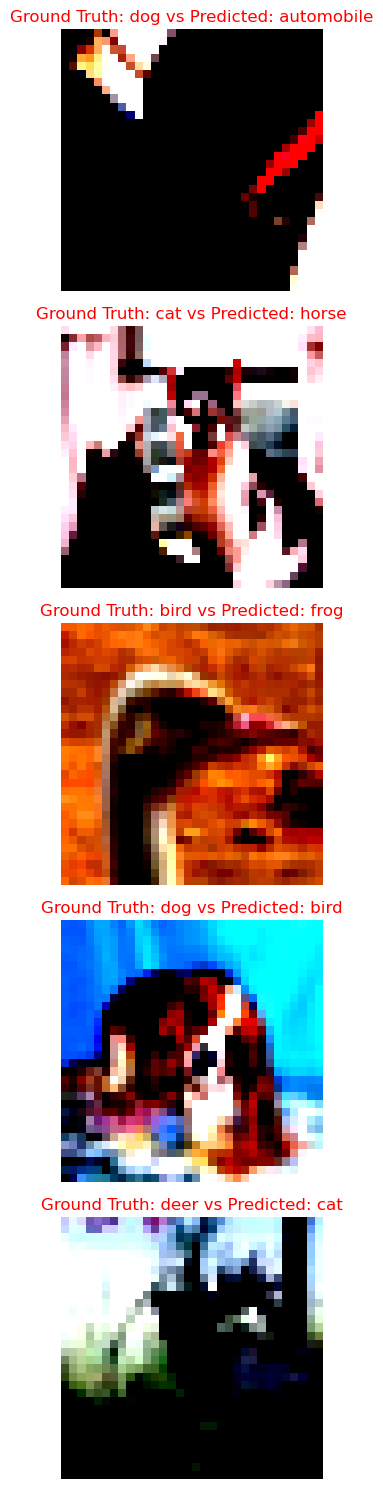

In [15]:
show_predictions(ten_cifar_model, test_data_loader)

### 3.3 Plot graphs

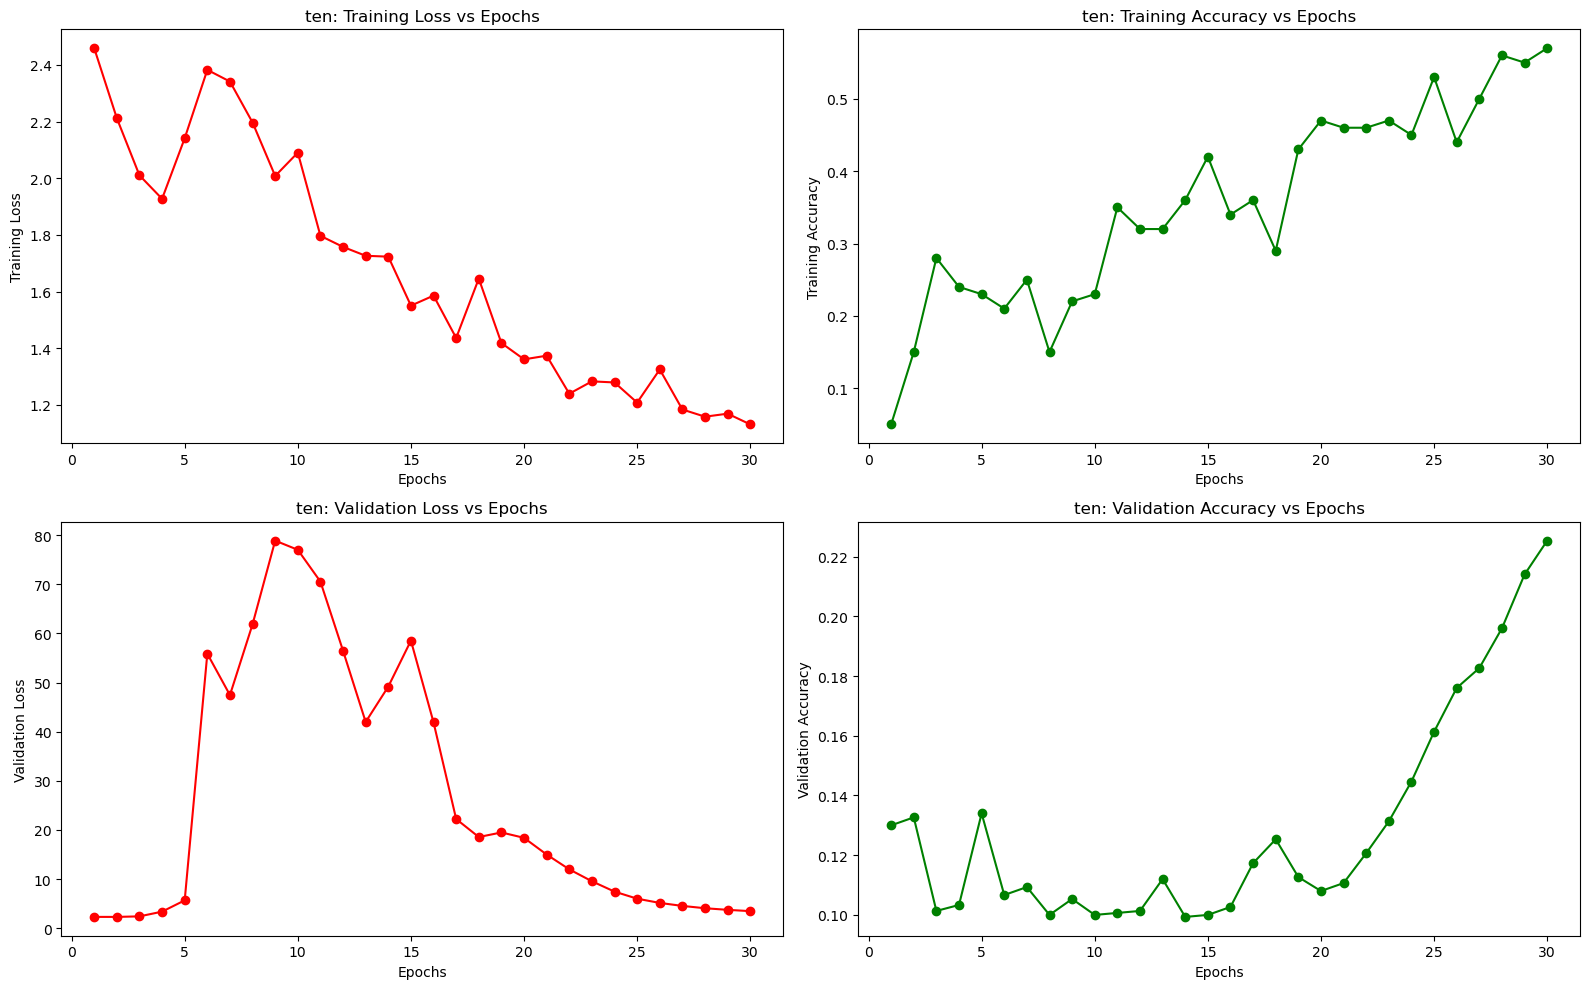

In [16]:
plot_model_training_stats(ten_experiment, ten_epoch_numbers, ten_training_losses, ten_validation_losses, ten_training_accuracy, ten_validation_accuracy)

# <u>Experiment 4: 100 instance per class dataset</u>

### 4.1 Train the model

In [17]:
hund_experiment = "hundred"
hund_cifar_model = CIFARClassifier()
hund_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [18]:
hund_epoch_numbers, hund_training_losses, hund_training_accuracy, hund_validation_losses, hund_validation_accuracy = train_model(
    hund_cifar_model,
    train_data_num_100_loader,
    validation_data_loader,
    30,
    params,
    hund_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.3463677763938904 | train_accuracy: 0.143 | val_loss: 2.263238708178202 | val_accuracy: 0.20066666666666666 


Epoch 2/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2: train_loss: 2.087074398994446 | train_accuracy: 0.241 | val_loss: 2.1374919414520264 | val_accuracy: 0.184 


Epoch 3/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3: train_loss: 1.9233936369419098 | train_accuracy: 0.288 | val_loss: 3.5796945095062256 | val_accuracy: 0.206 


Epoch 4/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.9220077991485596 | train_accuracy: 0.281 | val_loss: 3.949190060297648 | val_accuracy: 0.22666666666666666 


Epoch 5/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.8661015033721924 | train_accuracy: 0.313 | val_loss: 5.288287957509358 | val_accuracy: 0.20066666666666666 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 6: train_loss: 1.7696133255958557 | train_accuracy: 0.309 | val_loss: 21.36022694905599 | val_accuracy: 0.10733333333333334 


Epoch 7/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 7: train_loss: 1.794440507888794 | train_accuracy: 0.344 | val_loss: 7.841272830963135 | val_accuracy: 0.114 


Epoch 8/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 8: train_loss: 1.7445389926433563 | train_accuracy: 0.36 | val_loss: 6.595069805781047 | val_accuracy: 0.162 


Epoch 9/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.681431770324707 | train_accuracy: 0.367 | val_loss: 2.073658029238383 | val_accuracy: 0.306 


Epoch 10/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.704290121793747 | train_accuracy: 0.358 | val_loss: 1.8994155526161194 | val_accuracy: 0.332 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.5959481298923492 | train_accuracy: 0.417 | val_loss: 2.563856919606527 | val_accuracy: 0.292 


Epoch 12/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.643403321504593 | train_accuracy: 0.402 | val_loss: 2.256443460782369 | val_accuracy: 0.2853333333333333 


Epoch 13/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.520388662815094 | train_accuracy: 0.437 | val_loss: 2.09513129790624 | val_accuracy: 0.3453333333333333 


Epoch 14/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.441664069890976 | train_accuracy: 0.462 | val_loss: 1.6120585600535076 | val_accuracy: 0.4266666666666667 


Epoch 15/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.4020812213420868 | train_accuracy: 0.492 | val_loss: 2.049927234649658 | val_accuracy: 0.376 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.416385531425476 | train_accuracy: 0.489 | val_loss: 2.284695267677307 | val_accuracy: 0.33266666666666667 


Epoch 17/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.374121993780136 | train_accuracy: 0.495 | val_loss: 1.6777174075444539 | val_accuracy: 0.392 


Epoch 18/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 18: train_loss: 1.2818655967712402 | train_accuracy: 0.534 | val_loss: 1.512786070505778 | val_accuracy: 0.462 


Epoch 19/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 19: train_loss: 1.27999609708786 | train_accuracy: 0.534 | val_loss: 1.6024555365244548 | val_accuracy: 0.44 


Epoch 20/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 20: train_loss: 1.1824619770050049 | train_accuracy: 0.558 | val_loss: 1.4532392024993896 | val_accuracy: 0.4653333333333333 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 21: train_loss: 1.1414128541946411 | train_accuracy: 0.576 | val_loss: 1.3926452000935872 | val_accuracy: 0.48933333333333334 


Epoch 22/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 22: train_loss: 1.0508735179901123 | train_accuracy: 0.606 | val_loss: 1.4179769953091939 | val_accuracy: 0.5006666666666667 


Epoch 23/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 23: train_loss: 1.0127546340227127 | train_accuracy: 0.624 | val_loss: 1.4058961272239685 | val_accuracy: 0.5066666666666667 


Epoch 24/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 24: train_loss: 0.9712857156991959 | train_accuracy: 0.642 | val_loss: 1.3805188139279683 | val_accuracy: 0.5226666666666666 


Epoch 25/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.9857715219259262 | train_accuracy: 0.652 | val_loss: 1.3910799225171406 | val_accuracy: 0.5013333333333333 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.9335249364376068 | train_accuracy: 0.655 | val_loss: 1.361052691936493 | val_accuracy: 0.514 


Epoch 27/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.9290817677974701 | train_accuracy: 0.662 | val_loss: 1.3431906302769978 | val_accuracy: 0.5226666666666666 


Epoch 28/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.8811322003602982 | train_accuracy: 0.674 | val_loss: 1.3409055868784587 | val_accuracy: 0.5266666666666666 


Epoch 29/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.9082468748092651 | train_accuracy: 0.664 | val_loss: 1.3386773069699605 | val_accuracy: 0.5273333333333333 


Epoch 30/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.8954250663518906 | train_accuracy: 0.673 | val_loss: 1.343700110912323 | val_accuracy: 0.5266666666666666 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_30.pt


### 4.2 Test the model

In [19]:
hund_cifar_test_accuracy, hund_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, hund_cifar_model, test_data_loader)
print(f"Test loss: {hund_cifar_test_loss} | Test accuracy: {hund_cifar_test_accuracy}")

Test loss: 1.40163157266729 | Test accuracy: 0.5229411764705882


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


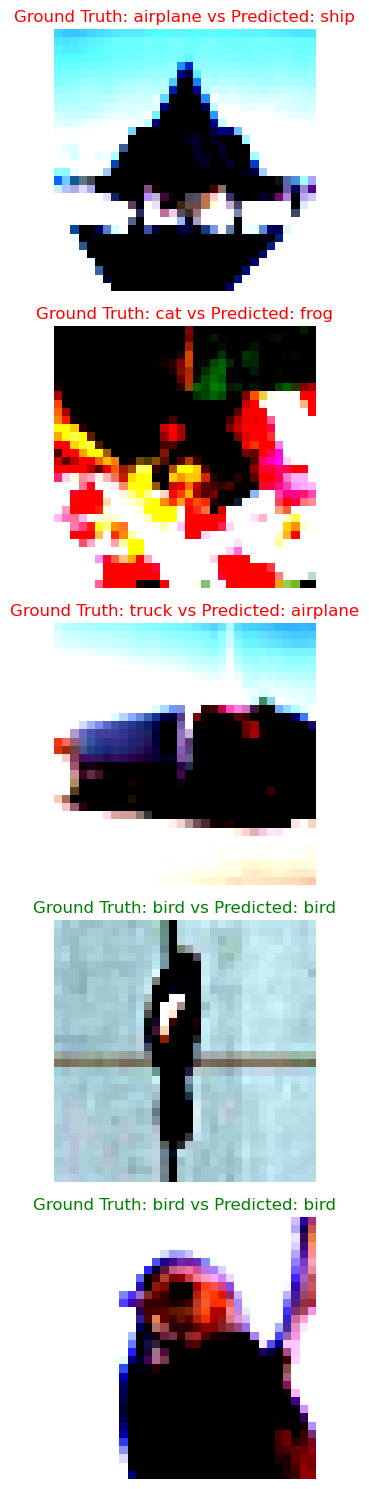

In [20]:
show_predictions(hund_cifar_model, test_data_loader)

### 4.3 Plot graphs

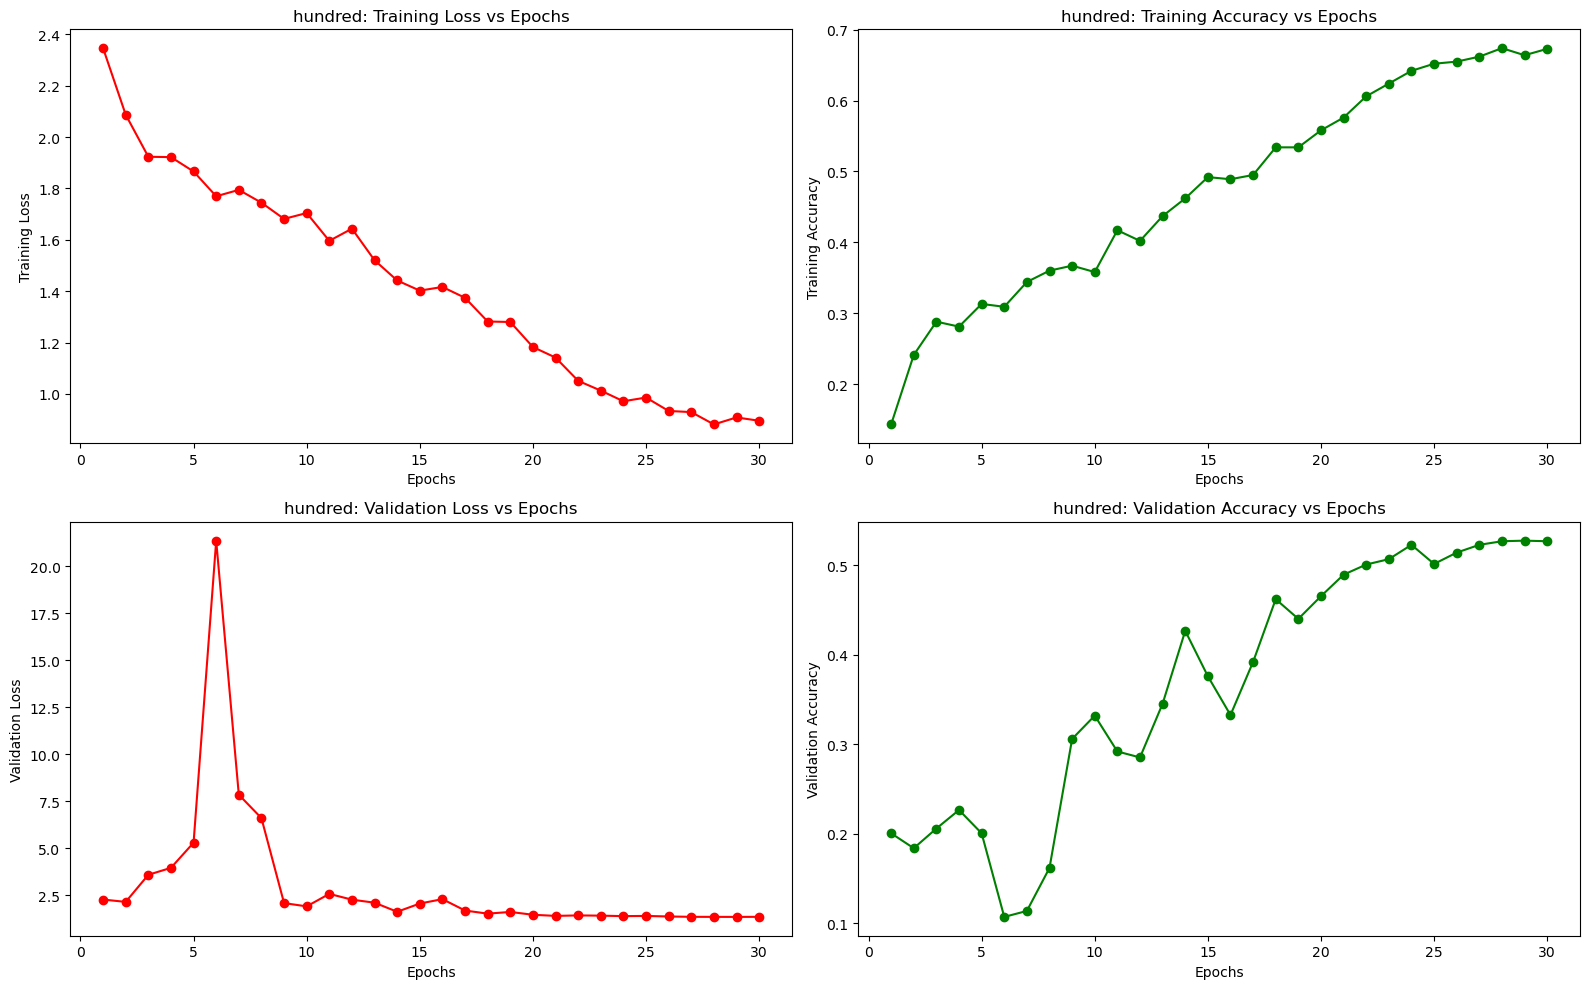

In [21]:
plot_model_training_stats(hund_experiment, hund_epoch_numbers, hund_training_losses, hund_validation_losses, hund_training_accuracy, hund_validation_accuracy)

# <u>Experiment 5: 1000 instance per class dataset</u>

### 5.1 Train the model

In [22]:
thous_experiment = "thousand"
thous_cifar_model = CIFARClassifier()
thous_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [23]:
thous_epoch_numbers, thous_training_losses, thous_training_accuracy, thous_validation_losses, thous_validation_accuracy = train_model(
    thous_cifar_model,
    train_data_num_1000_loader,
    validation_data_loader,
    30,
    params,
    thous_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1: train_loss: 1.866525235772133 | train_accuracy: 0.3023 | val_loss: 1.6444562673568726 | val_accuracy: 0.37866666666666665 


Epoch 2/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 2: train_loss: 1.5843701213598251 | train_accuracy: 0.4054 | val_loss: 1.6918776631355286 | val_accuracy: 0.404 


Epoch 3/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 3: train_loss: 1.4503842681646346 | train_accuracy: 0.4718 | val_loss: 1.5205589334170024 | val_accuracy: 0.458 


Epoch 4/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.3489639729261398 | train_accuracy: 0.5085 | val_loss: 2.198468883832296 | val_accuracy: 0.33666666666666667 


Epoch 5/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.4477990716695786 | train_accuracy: 0.4774 | val_loss: 2.075190782546997 | val_accuracy: 0.39866666666666667 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 6: train_loss: 1.4031850218772888 | train_accuracy: 0.5003 | val_loss: 1.3019312421480815 | val_accuracy: 0.5353333333333333 


Epoch 7/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 7: train_loss: 1.3030363738536834 | train_accuracy: 0.5337 | val_loss: 1.7095990379651387 | val_accuracy: 0.44733333333333336 


Epoch 8/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 8: train_loss: 1.2828800916671752 | train_accuracy: 0.5425 | val_loss: 1.6437444885571797 | val_accuracy: 0.45266666666666666 


Epoch 9/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.2330646604299544 | train_accuracy: 0.5583 | val_loss: 3.0237786769866943 | val_accuracy: 0.33 


Epoch 10/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.2988893896341325 | train_accuracy: 0.5465 | val_loss: 1.8831465045611064 | val_accuracy: 0.414 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.2449101746082305 | train_accuracy: 0.5587 | val_loss: 1.372183879216512 | val_accuracy: 0.5266666666666666 


Epoch 12/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.1657825499773025 | train_accuracy: 0.5837 | val_loss: 1.3474303086598713 | val_accuracy: 0.5786666666666667 


Epoch 13/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.1009218230843545 | train_accuracy: 0.6107 | val_loss: 1.4039379755655925 | val_accuracy: 0.5006666666666667 


Epoch 14/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.0968396380543708 | train_accuracy: 0.6166 | val_loss: 1.2710982759793599 | val_accuracy: 0.572 


Epoch 15/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 15: train_loss: 0.9978140965104103 | train_accuracy: 0.6506 | val_loss: 1.2008108695348103 | val_accuracy: 0.594 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 16: train_loss: 0.9676153481006622 | train_accuracy: 0.6667 | val_loss: 1.0214399794737499 | val_accuracy: 0.6613333333333333 


Epoch 17/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 17: train_loss: 0.9457336708903312 | train_accuracy: 0.6641 | val_loss: 0.8966982762018839 | val_accuracy: 0.688 


Epoch 18/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 18: train_loss: 0.8562056750059128 | train_accuracy: 0.6982 | val_loss: 1.2286272843678792 | val_accuracy: 0.62 


Epoch 19/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 19: train_loss: 0.8871905580163002 | train_accuracy: 0.6914 | val_loss: 0.8999480605125427 | val_accuracy: 0.6886666666666666 


Epoch 20/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 20: train_loss: 0.8140575483441352 | train_accuracy: 0.7187 | val_loss: 0.7670486470063528 | val_accuracy: 0.732 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 21: train_loss: 0.7452785298228264 | train_accuracy: 0.7302 | val_loss: 0.7260833481947581 | val_accuracy: 0.7646666666666667 


Epoch 22/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 22: train_loss: 0.6907261401414871 | train_accuracy: 0.7672 | val_loss: 0.6629211604595184 | val_accuracy: 0.78 


Epoch 23/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 23: train_loss: 0.7052936613559723 | train_accuracy: 0.7564 | val_loss: 0.6429433027903239 | val_accuracy: 0.7773333333333333 


Epoch 24/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 24: train_loss: 0.6070242166519165 | train_accuracy: 0.7847 | val_loss: 0.718803475300471 | val_accuracy: 0.7746666666666666 


Epoch 25/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.5536159887909889 | train_accuracy: 0.807 | val_loss: 0.6092467159032822 | val_accuracy: 0.8086666666666666 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.5336911492049694 | train_accuracy: 0.8201 | val_loss: 0.560836985707283 | val_accuracy: 0.7993333333333333 


Epoch 27/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.4763745032250881 | train_accuracy: 0.8349 | val_loss: 0.5488576789697012 | val_accuracy: 0.8206666666666667 


Epoch 28/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.4351244457066059 | train_accuracy: 0.8463 | val_loss: 0.5201582461595535 | val_accuracy: 0.834 


Epoch 29/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.4137695491313934 | train_accuracy: 0.8524 | val_loss: 0.5185302396615347 | val_accuracy: 0.834 


Epoch 30/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.40133262760937216 | train_accuracy: 0.8589 | val_loss: 0.5168154786030451 | val_accuracy: 0.8333333333333334 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_30.pt


### 5.2 Test the model

In [24]:
thous_cifar_test_accuracy, thous_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, thous_cifar_model, test_data_loader)
print(f"Test loss: {thous_cifar_test_loss} | Test accuracy: {thous_cifar_test_accuracy}")

Test loss: 0.5567597440060448 | Test accuracy: 0.8184705882352942


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


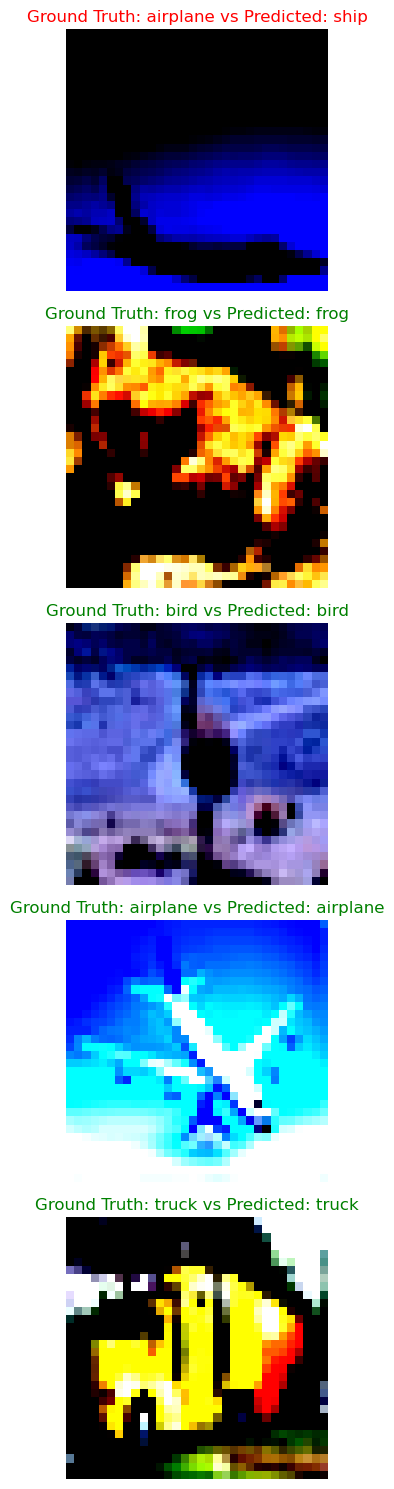

In [25]:
show_predictions(thous_cifar_model, test_data_loader)

### 5.3 Plot graphs

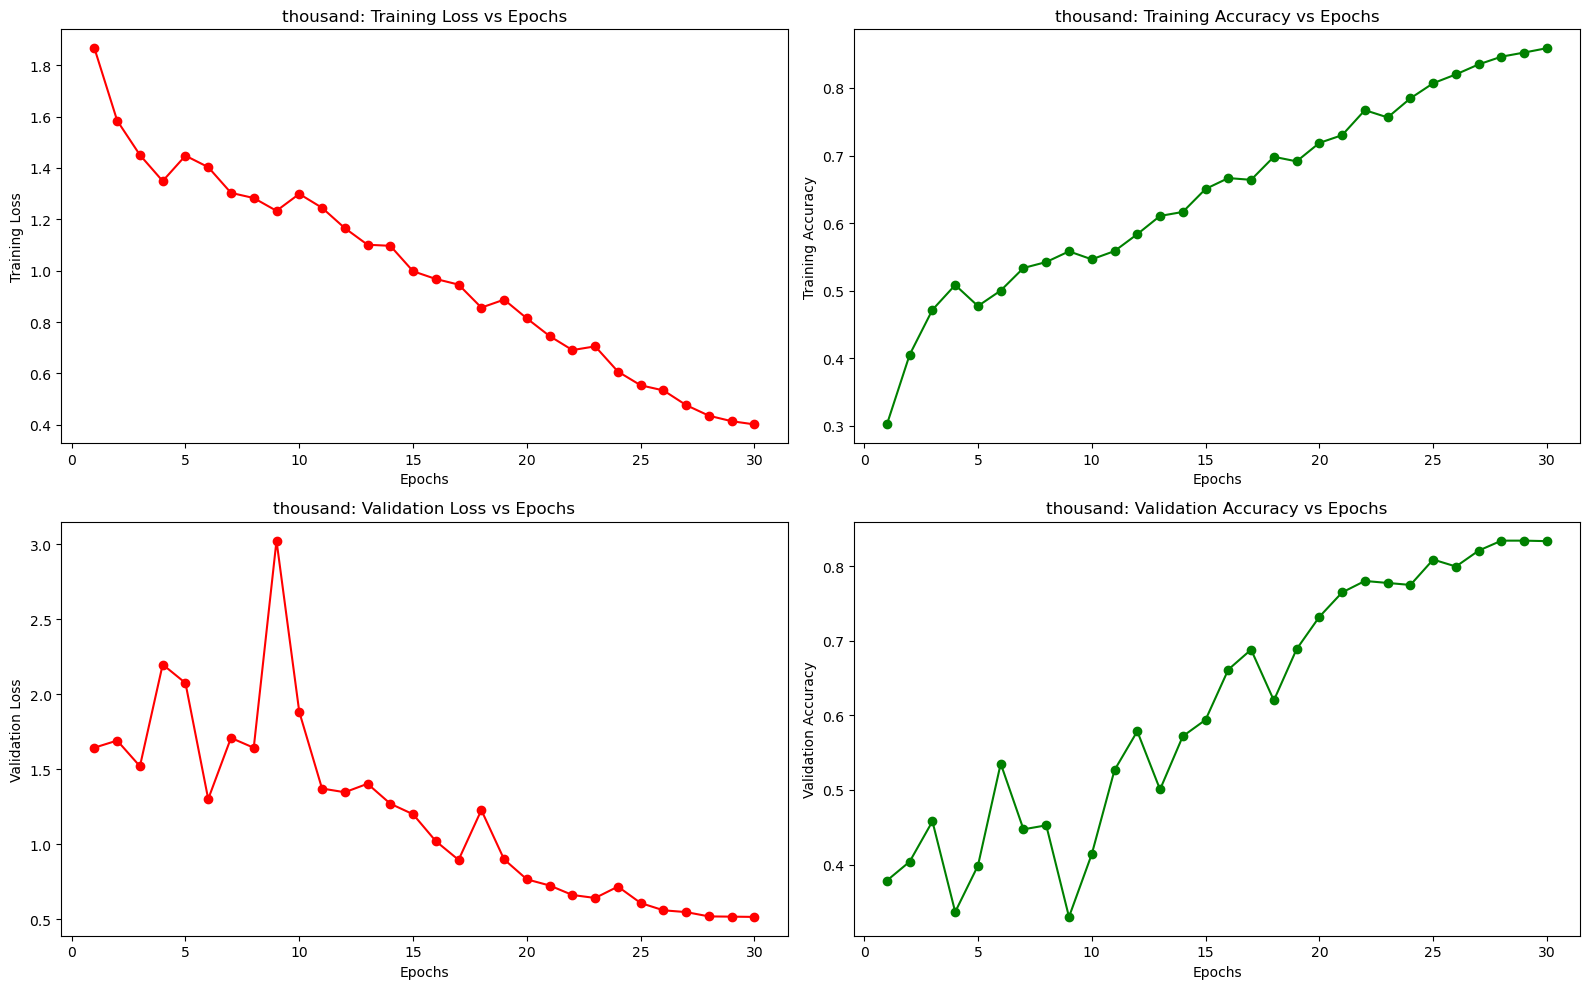

In [26]:
plot_model_training_stats(thous_experiment, thous_epoch_numbers, thous_training_losses, thous_validation_losses, thous_training_accuracy, thous_validation_accuracy)

# Plotting training-test accuracy vs num of instances

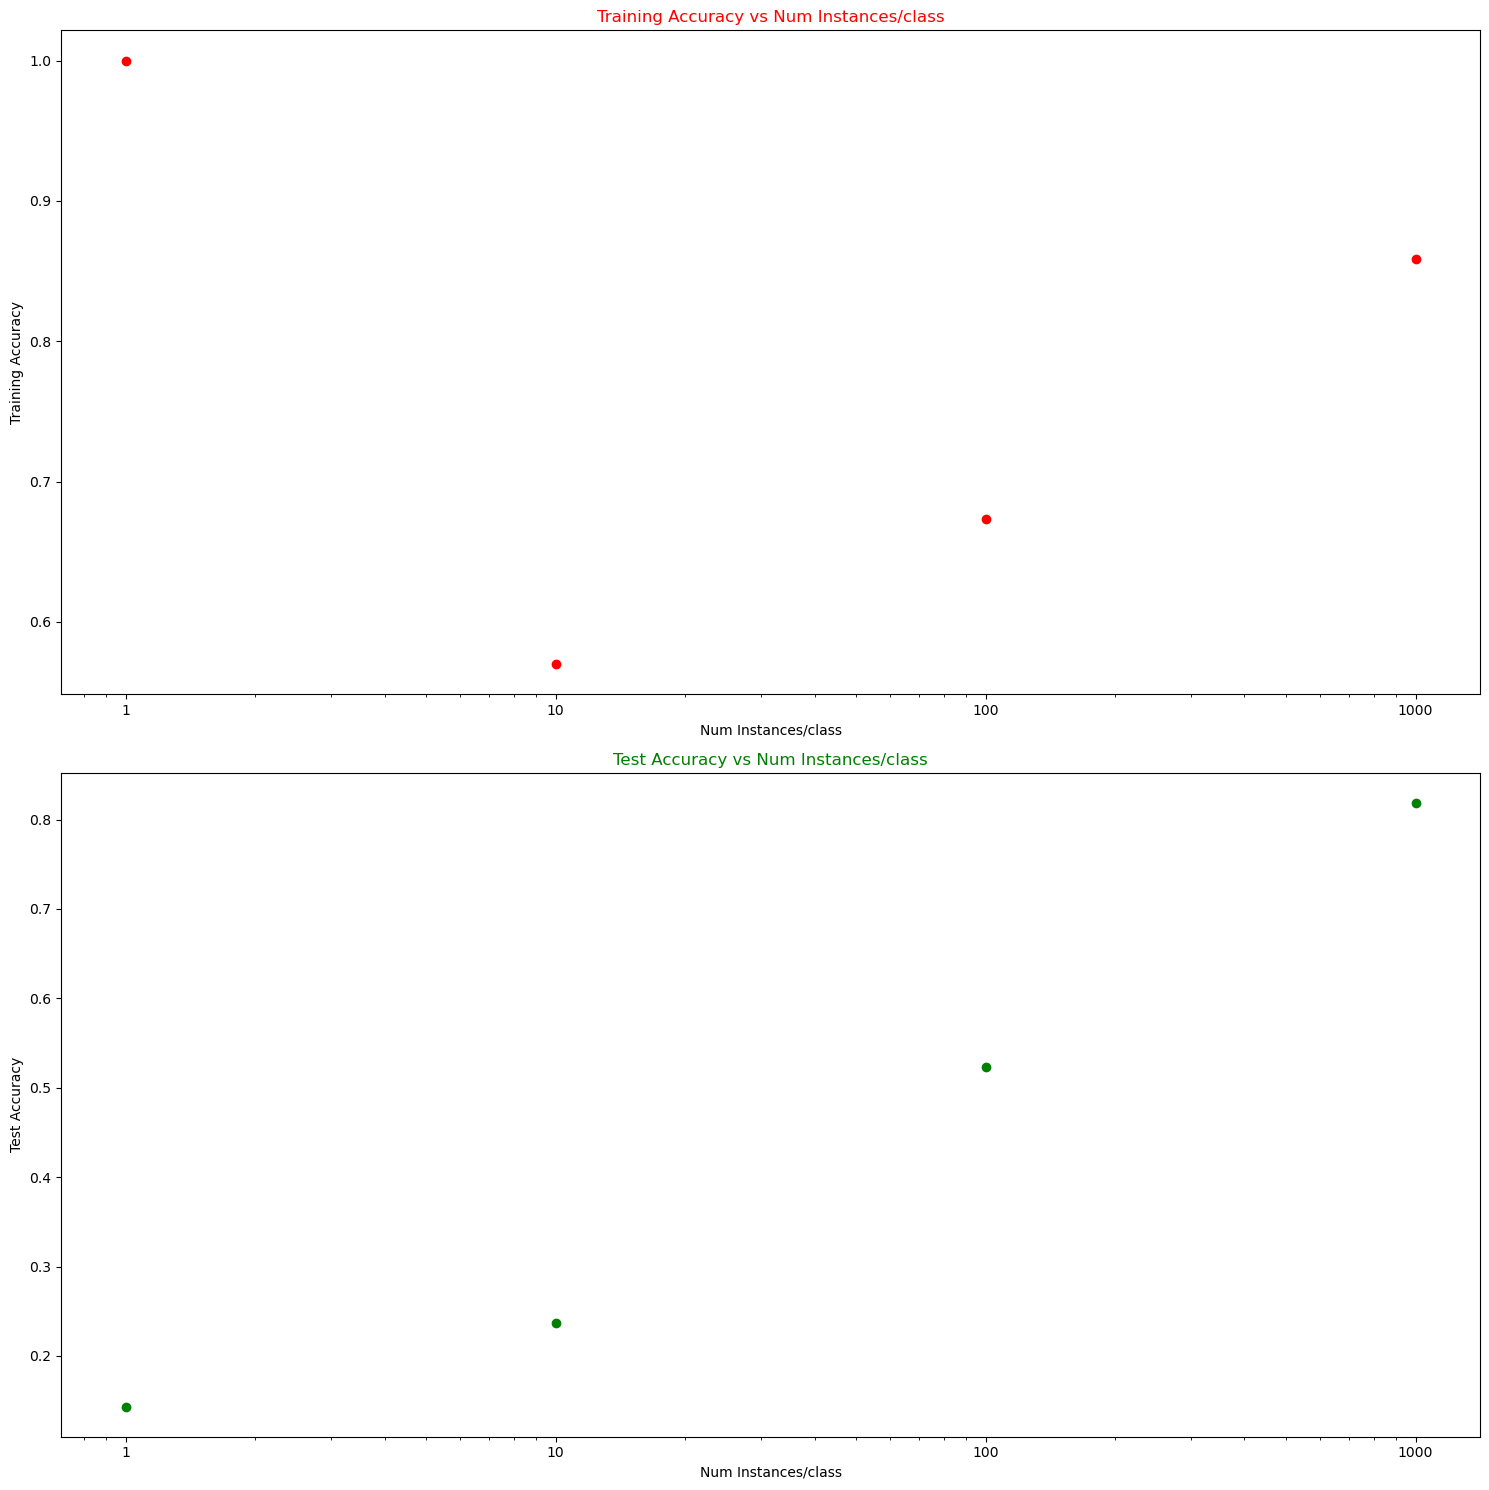

In [28]:
num_instance = [1, 10, 100, 1000]
final_training_accuracies = [
    one_training_accuracy[-1],
    ten_training_accuracy[-1],
    hund_training_accuracy[-1],
    thous_training_accuracy[-1]
]
final_test_accuracies = [
    one_cifar_test_accuracy,
    ten_cifar_test_accuracy,
    hund_cifar_test_accuracy,
    thous_cifar_test_accuracy
]
# Create a subplot grid
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

axes[0].scatter(num_instance, final_training_accuracies, marker="o", color="red")
axes[0].set_title(f'Training Accuracy vs Num Instances/class', color='red')
axes[0].set_xscale('log')  # Set x-axis to logarithmic scale
axes[0].set_xticks(num_instance)  # Set the x-axis ticks to the specified points
axes[0].get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Format x-axis labels
axes[0].set_xlabel('Num Instances/class')
axes[0].set_ylabel('Training Accuracy')

axes[1].scatter(num_instance, final_test_accuracies, marker="o", color="green")
axes[1].set_title(f'Test Accuracy vs Num Instances/class', color='green')
axes[1].set_xscale('log')  # Set x-axis to logarithmic scale
axes[1].set_xticks(num_instance)  # Set the x-axis ticks to the specified points
axes[1].get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Format x-axis labels
axes[1].set_xlabel('Num Instances/class')
axes[1].set_ylabel('Test Accuracy')

plt.tight_layout()
plt.show()